In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("Advertising.csv")
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

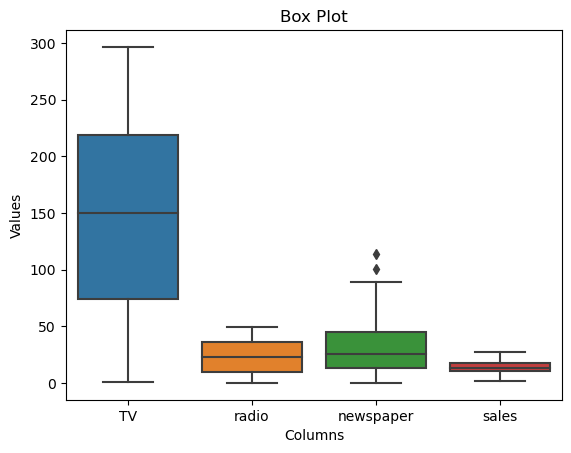

In [8]:
# Reshaping the DataFrame
df_melted = df.melt(var_name='Columns', value_name='Values')

# Create a box plot
sns.boxplot(x='Columns', y='Values', data=df_melted)

# Add title
plt.title('Box Plot')

# Show plot
plt.show()

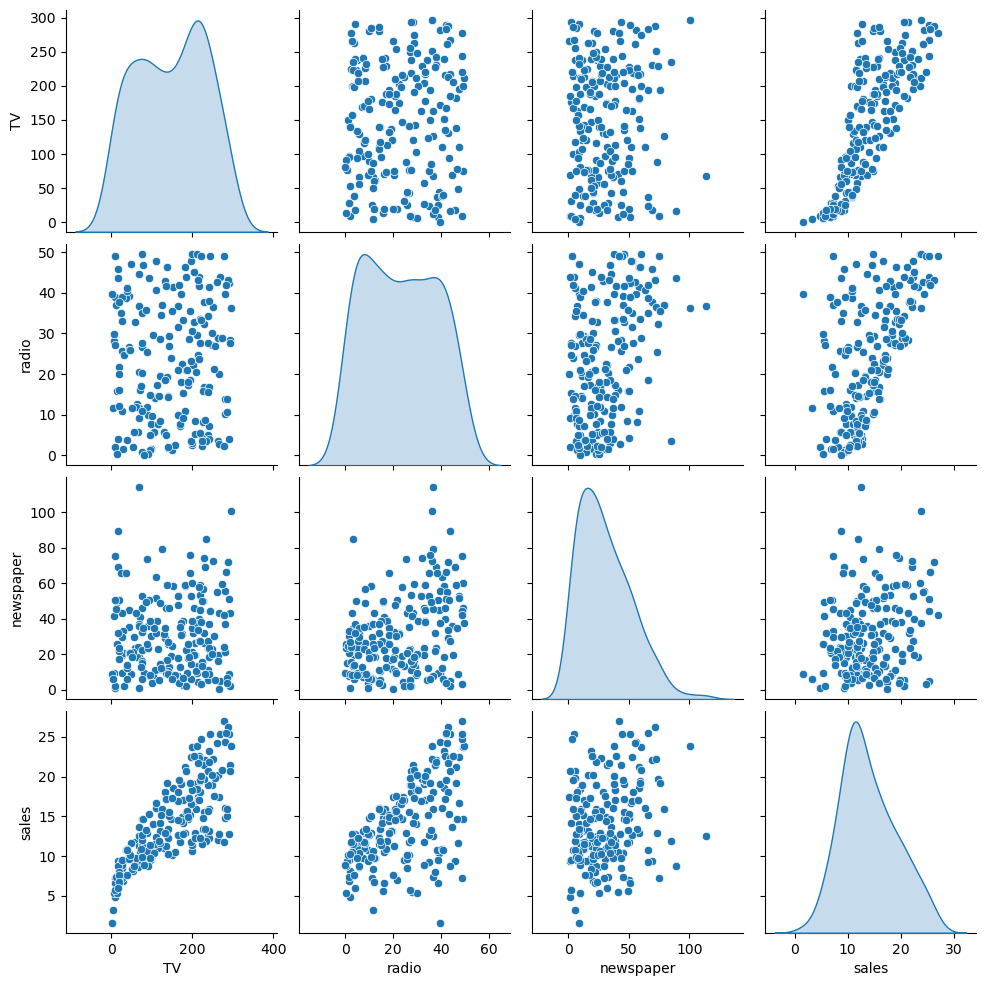

In [9]:
sns.pairplot(df, diag_kind='kde')
# Show plot
plt.show()

### Separate the Features & Target variables

In [10]:
X = df.drop("sales", axis = 1)
y = df['sales']

## Creating Polynomial Features
#### PolynomialFeatures( )
##### Degree -> select the degree transformation desired
##### Interaction_only -> Default = False --> Create interaction between the features as new features
##### Include_bias -> Default = True --> a column of ones - acts as an intercept term in a linear model

In [12]:
X.shape

(200, 3)

#### Creating only interaction terms using PolynomialFeatures

In [38]:
polynomial_features_only = PolynomialFeatures(interaction_only = True, include_bias=False)

In [39]:
poly_features_only = polynomial_features_only.fit_transform(X)

In [40]:
poly_features_only.shape

(200, 6)

In [41]:
X.iloc[1]

TV           44.5
radio        39.3
newspaper    45.1
Name: 1, dtype: float64

In [42]:
poly_features_only[1]

array([  44.5 ,   39.3 ,   45.1 , 1748.85, 2006.95, 1772.43])

#### Interaction Terms Created

In [43]:
X.TV[1] * X.radio[1]

1748.85

In [44]:
X.TV[1] * X.newspaper[1]

2006.95

In [45]:
X.radio[1] * X.newspaper[1]

1772.4299999999998

#### Creating PolynomialFeatures with Degree 2 & the interaction Terms

In [46]:
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)

#### Reads in every X columns & "transforms" and ouputs the new polynomial data

In [47]:
poly_features = polynomial_features.fit_transform(X)

In [48]:
poly_features.shape

(200, 9)

In [49]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

#### 2nd Degree Polynomial creates the following:
##### 1. Interaction Terms -> TV * Radio, TV * Newspaper, Radio * Newspaper
##### 2. Degree of 2 will square each variable -> TV ** 2, Radio ** 2, Newspaper ** 2

In [50]:
# Original Data row 1
X.iloc[1]

TV           44.5
radio        39.3
newspaper    45.1
Name: 1, dtype: float64

In [51]:
# Results of the Polynomial Features created for row 1
poly_features[1]

array([  44.5 ,   39.3 ,   45.1 , 1980.25, 1748.85, 2006.95, 1544.49,
       1772.43, 2034.01])

### Features Squared

In [52]:
poly_features[1][:3]

array([44.5, 39.3, 45.1])

In [53]:
poly_features[1][:3] ** 2

array([1980.25, 1544.49, 2034.01])

#### Train Test Split the poly features we created

In [56]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.30, random_state = 42)

#### Create an instance of the model with parameters

In [57]:
lr = LinearRegression(fit_intercept=True)

#### Fit/Train the Model on the training data


In [59]:
lr.fit(X_train,y_train)

LinearRegression()


-----

####  Evaluation on the Test Set - Calculate Performance on Test Set

In [60]:
predictions = lr.predict(X_test)

In [110]:
lr.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

#### Metrics to mesure performance

In [62]:
MAE = mean_absolute_error(y_test,predictions)
MAE

0.5905974833807984

In [63]:
MSE = mean_squared_error(y_test,predictions)
MSE

0.5231944949055375

In [66]:
RMSE = np.sqrt(MSE)
RMSE

0.7233218473857522

### Build a normal Regression model to compare without the Polynomial features

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [68]:
lr_normal = LinearRegression()

In [69]:
lr_normal.fit(X_train, y_train)

LinearRegression()

In [70]:
predict_lrNormal = lr_normal.predict(X_test)

In [74]:
lrNormal_mae = mean_absolute_error(y_test,predict_lrNormal)

In [75]:
lrNormal_mse = mean_squared_error(y_test,predict_lrNormal)

In [76]:
lrNormal_rmse = np.sqrt(mean_squared_error(y_test,predict_lrNormal))

### Build a normal Regression model to compare without the Polynomial features

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [68]:
lr_normal = LinearRegression()

In [69]:
lr_normal.fit(X_train, y_train)

LinearRegression()

In [70]:
predict_lrNormal = lr_normal.predict(X_test)

In [109]:
lr_normal.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [74]:
lrNormal_mae = mean_absolute_error(y_test,predict_lrNormal)

In [75]:
lrNormal_mse = mean_squared_error(y_test,predict_lrNormal)

In [76]:
lrNormal_rmse = np.sqrt(mean_squared_error(y_test,predict_lrNormal))

### Build a Regression model with interaction terms to compare without the Polynomial features

#### Creating only interaction terms using PolynomialFeatures

In [96]:
polynomial_features_only = PolynomialFeatures(interaction_only = True, include_bias=False)

poly_features_only = polynomial_features_only.fit_transform(X)


In [97]:
poly_features_only.shape

(200, 6)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(poly_features_only, y, test_size = 0.30, random_state=42)


In [99]:
lr_interactions = LinearRegression(fit_intercept=True)

lr_interactions.fit(X_train, y_train)


LinearRegression()

In [100]:
lr_interactions

LinearRegression()

In [101]:
X_test.shape

(60, 6)

In [103]:
predict_lr_interactions = lr_interactions.predict(X_test)

In [108]:
lr_interactions.coef_

array([ 2.26995097e-02,  3.44277875e-02,  2.34330840e-02,  1.06905091e-03,
       -1.16182932e-04,  2.67343670e-05])

In [104]:

lr_interactions_mae = mean_absolute_error(y_test,predict_lr_interactions)

lr_interactions_mse = mean_squared_error(y_test,predict_lr_interactions)

lr_interactions_rmse = np.sqrt(mean_squared_error(y_test,predict_lr_interactions))

In [111]:
model_compare = pd.DataFrame({
                            'Normal Regression': [lrNormal_mae, lrNormal_mse, lrNormal_rmse],
                            'Interactions Only': [lr_interactions_mae, lr_interactions_mse,lr_interactions_rmse],
                            'Polynomial Results': [MAE,MSE,RMSE]                            
                                }, 
                                index=['MAE', 'MSE', 'RMSE'])

In [112]:
model_compare

Normal Regression  Interactions Only  Polynomial Results
MAE            1.511669           0.769041            0.590597
MSE            3.796797           1.007631            0.523194
RMSE           1.948537           1.003808            0.723322

In [113]:
# Normal basic Regression
lr_normal.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [114]:
# Regression using Feature Interactions
lr_interactions.coef_

array([ 2.26995097e-02,  3.44277875e-02,  2.34330840e-02,  1.06905091e-03,
       -1.16182932e-04,  2.67343670e-05])

In [115]:
# Polynomial Degree 2 with Feature Interactions
lr.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])